In [ ]:
 # Dataset : http://cb.lk/covid_19

 !wget http://cb.lk/covid_19


In [ ]:
!unzip covid_19

In [42]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image


In [44]:
from keras.layers.attention.multi_head_attention import activation
#CNN Based Model in Keras
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [46]:
#Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [47]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [48]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [50]:
hist = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
7/8 [=========================>....] - ETA: 10s - loss: 0.6870 - accuracy: 0.5402

8/8 [==============================] - 84s 10s/step - loss: 0.6870 - accuracy: 0.5402 - val_loss: 0.6868 - val_accuracy: 0.7333


In [51]:
#class Activation Maps
#Grad-CAM
model.save("model_covid.h5")
model.evaluate(train_generator)

7/7 [==============================] - 25s 3s/step - loss: 0.6875 - accuracy: 0.7455


[0.6874810457229614, 0.7455357313156128]

In [52]:
model.evaluate(validation_generator)

2/2 [==============================] - 8s 2s/step - loss: 0.6868 - accuracy: 0.7333


[0.6868308782577515, 0.7333333492279053]

In [53]:
#Test Images
model = load_model('model_covid.h5')

In [54]:
import os

In [55]:
y_actual = []
y_test = []

In [56]:
from PIL import Image

for i in os.listdir("./CovidDataset/Val/Normal/"):
    img = Image.open("./CovidDataset/Val/Normal/" + i)
    img = img.resize((224, 224))
    img = img.convert('RGB')  # Convert the image to RGB format if needed
    img = np.array(img)
    img = img.reshape((1, 224, 224, 3))  # Reshape the image to match the expected input shape
    probabilities = model.predict(img)
    predicted_class = np.argmax(probabilities, axis=1)
    y_test.append(predicted_class[0])
    y_actual.append(1)
    # Rest of your code...



1/1 [==============================] - 0s 85ms/step


In [57]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img = Image.open("./CovidDataset/Val/Covid/" + i)
    img = img.resize((224, 224))
    img = img.convert('RGB')  # Convert the image to RGB format if needed
    img = np.array(img)
    img = img.reshape((1, 224, 224, 3))  # Reshape the image to match the expected input shape
    probabilities = model.predict(img)
    predicted_class = np.argmax(probabilities, axis=1)
    y_test.append(predicted_class[0])
    y_actual.append(0)
    # Rest of your code...

1/1 [==============================] - 0s 87ms/step


In [58]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
cm = confusion_matrix(y_actual, y_test)

In [61]:
import seaborn as sns

<Axes: >

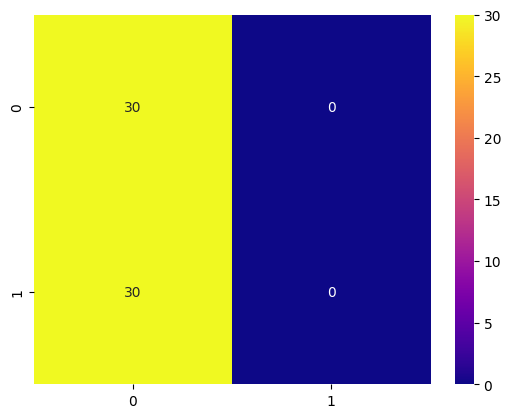

In [63]:
sns.heatmap(cm, cmap="plasma", annot=True)